In [11]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
data_set_name = sb.get_dataset_names()
print(data_set_name)


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [13]:
df = sb.load_dataset("titanic")

In [14]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [17]:
df["sex"].value_counts(normalize=True)

sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [18]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df["deck"].value_counts(normalize=True)

deck
C    0.290640
B    0.231527
D    0.162562
E    0.157635
A    0.073892
F    0.064039
G    0.019704
Name: proportion, dtype: float64

In [20]:
df.drop(["deck"], axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [21]:
df1=df.drop(["embarked","class","who","adult_male","deck","embark_town","alone"], axis=1)

In [22]:
df1

,survived,pclass,sex,age,sibsp,parch,fare,alive
0,0,3,male,22.0,1,0,7.2500,no
1,1,1,female,38.0,1,0,71.2833,yes
2,1,3,female,26.0,0,0,7.9250,yes
3,1,1,female,35.0,1,0,53.1000,yes
4,0,3,male,35.0,0,0,8.0500,no
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,no
887,1,1,female,19.0,0,0,30.0000,yes
888,0,3,female,NaN,1,2,23.4500,no
889,1,1,male,26.0,0,0,30.0000,yes


In [23]:
df1["sex"].mode()[0]

'male'

In [24]:
df1["age"].mode()

0    24.0
Name: age, dtype: float64

In [25]:
df1["age"].mean()

29.69911764705882

In [26]:
df1.loc[:, "sex"].mode()

0    male
Name: sex, dtype: object

In [27]:
df1.min()

survived         0
pclass           1
sex         female
age           0.42
sibsp            0
parch            0
fare           0.0
alive           no
dtype: object

In [28]:
bool_series = pd.notnull(df1["sex"])
df1

,survived,pclass,sex,age,sibsp,parch,fare,alive
0,0,3,male,22.0,1,0,7.2500,no
1,1,1,female,38.0,1,0,71.2833,yes
2,1,3,female,26.0,0,0,7.9250,yes
3,1,1,female,35.0,1,0,53.1000,yes
4,0,3,male,35.0,0,0,8.0500,no
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,no
887,1,1,female,19.0,0,0,30.0000,yes
888,0,3,female,NaN,1,2,23.4500,no
889,1,1,male,26.0,0,0,30.0000,yes


In [29]:
df1.fillna(df1["age"].mean(), inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()

In [32]:
df1["sex"]= label_encoder.fit_transform(df1["sex"])
df1["sex"].unique()

array([1, 0])

In [33]:
df1

,survived,pclass,sex,age,sibsp,parch,fare,alive
0,0,3,1,22.000000,1,0,7.2500,no
1,1,1,0,38.000000,1,0,71.2833,yes
2,1,3,0,26.000000,0,0,7.9250,yes
3,1,1,0,35.000000,1,0,53.1000,yes
4,0,3,1,35.000000,0,0,8.0500,no
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,no
887,1,1,0,19.000000,0,0,30.0000,yes
888,0,3,0,29.699118,1,2,23.4500,no
889,1,1,1,26.000000,0,0,30.0000,yes


In [34]:
df1["alive"] = label_encoder.fit_transform(df1["alive"])
df1["alive"].unique()

array([0, 1])

In [35]:
df1

,survived,pclass,sex,age,sibsp,parch,fare,alive
0,0,3,1,22.000000,1,0,7.2500,0
1,1,1,0,38.000000,1,0,71.2833,1
2,1,3,0,26.000000,0,0,7.9250,1
3,1,1,0,35.000000,1,0,53.1000,1
4,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0
887,1,1,0,19.000000,0,0,30.0000,1
888,0,3,0,29.699118,1,2,23.4500,0
889,1,1,1,26.000000,0,0,30.0000,1


In [36]:
x = df1.drop(["alive"], axis=1)

In [37]:
y = df1["alive"]

In [38]:
x

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [39]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: alive, Length: 891, dtype: int32

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
train_x, test_x, train_y, test_y=train_test_split(x,y,test_size= 0.2, random_state=1)

In [42]:
train_x

,survived,pclass,sex,age,sibsp,parch,fare
301,1,3,1,29.699118,2,0,23.2500
309,1,1,0,30.000000,0,0,56.9292
516,1,2,0,34.000000,0,0,10.5000
120,0,2,1,21.000000,2,0,73.5000
570,1,2,1,62.000000,0,0,10.5000
...,...,...,...,...,...,...,...
715,0,3,1,19.000000,0,0,7.6500
767,0,3,0,30.500000,0,0,7.7500
72,0,2,1,21.000000,0,0,73.5000
235,0,3,0,29.699118,0,0,7.5500


In [43]:
train_y

301    1
309    1
516    1
120    0
570    1
      ..
715    0
767    0
72     0
235    0
37     0
Name: alive, Length: 712, dtype: int32

In [44]:
test_x

,survived,pclass,sex,age,sibsp,parch,fare
862,1,1,0,48.000000,0,0,25.9292
223,0,3,1,29.699118,0,0,7.8958
84,1,2,0,17.000000,0,0,10.5000
680,0,3,0,29.699118,0,0,8.1375
535,1,2,0,7.000000,0,2,26.2500
...,...,...,...,...,...,...,...
796,1,1,0,49.000000,0,0,25.9292
815,0,1,1,29.699118,0,0,0.0000
629,0,3,1,29.699118,0,0,7.7333
421,0,3,1,21.000000,0,0,7.7333


In [45]:
test_y

862    1
223    0
84     1
680    0
535    1
      ..
796    1
815    0
629    0
421    0
448    1
Name: alive, Length: 179, dtype: int32

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [48]:
train_x_scaled=scaler.fit_transform(train_x)
train_x_scaled

array([[1.        , 1.        , 1.        , ..., 0.25      , 0.        ,
        0.04538098],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.1111184 ],
       [1.        , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.02049464],
       ...,
       [0.        , 0.5       , 1.        , ..., 0.        , 0.        ,
        0.14346245],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.01473662],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.01571255]])

In [49]:
cols = train_x.columns
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [50]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled

array([[1.        , 1.        , 1.        , ..., 0.25      , 0.        ,
        0.04538098],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.1111184 ],
       [1.        , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.02049464],
       ...,
       [0.        , 0.5       , 1.        , ..., 0.        , 0.        ,
        0.14346245],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.01473662],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.01571255]])

In [51]:
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)

In [52]:
train_x_scaled

,survived,pclass,sex,age,sibsp,parch,fare
0,1.0,1.0,1.0,0.367921,0.25,0.0,0.045381
1,1.0,0.0,0.0,0.371701,0.00,0.0,0.111118
2,1.0,0.5,0.0,0.421965,0.00,0.0,0.020495
3,0.0,0.5,1.0,0.258608,0.25,0.0,0.143462
4,1.0,0.5,1.0,0.773813,0.00,0.0,0.020495
...,...,...,...,...,...,...,...
707,0.0,1.0,1.0,0.233476,0.00,0.0,0.014932
708,0.0,1.0,0.0,0.377984,0.00,0.0,0.015127
709,0.0,0.5,1.0,0.258608,0.00,0.0,0.143462
710,0.0,1.0,0.0,0.367921,0.00,0.0,0.014737


In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
gnb= GaussianNB()
gnb.fit(train_x, train_y)

GaussianNB()

In [55]:
train_predict=gnb.predict(train_x)
test_predict= gnb.predict(test_x)

In [56]:
train_predict

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,

In [57]:
test_predict

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [59]:
%pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [58]:
from mlxtend.plotting import plot_confusion_matrix

In [59]:
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score

In [60]:
accuracy = accuracy_score(test_y, test_predict)
conf_matrix = confusion_matrix(test_y, test_predict)
accuracy

1.0

In [61]:
print("Accuracy:", accuracy)
print("Confusion_Matrix: ")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(test_y, test_predict))

Accuracy: 1.0
Confusion_Matrix: 
[[106   0]
 [  0  73]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        73

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



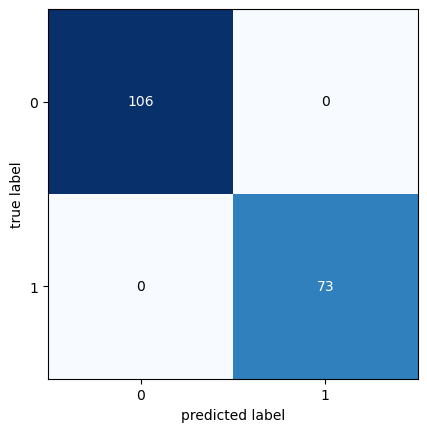

In [62]:
fig, ax = plot_confusion_matrix(conf_mat = conf_matrix)
plt.show()

<Axes: >

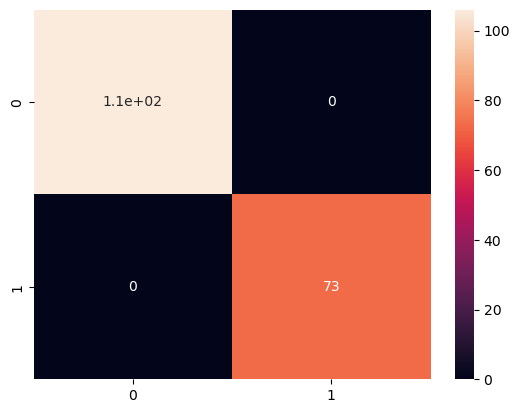

In [63]:
sb.heatmap(conf_matrix, annot=True)